# **Team 7 Assignment**

## Introduction

The following project and its contents have been created by Lauren Kohn, Charles Ni, Mingqian Xie, Tatiana Yate and Julia Zhou under the guidance and supervision of Mohammad Soltanieh-ha. Reproduction and/or distribution of contents in this project for financial gains or otherwise is strictly prohibited without the written permission of the team members or the instructor. Violators will be prosecuted with full extend of law along with any equitable monetary fines.

## Goal of the Project

Between 2020 and 2024, the global beer market is expected to grow by nearly **$100 billion**. Rising disposable incomes and consumers' shift from traditional products to higher-quality, attractively branded beer has underpinned rising beer consumption and strong volume growth in emerging markets. 

We, as an international online retailer selling different types of beers, want to **understand our customers’ drinking preferences, and then make recommendations to them to boost sales**.

We used the dataset of Beer_Reviews which contains around **1.5 Millions reviews** of beers from BeerAdvocates, one of the world's leading online review sites for beers. The reviews covered scores on **aroma, appearance, taste, palate and style**.

We have chosen unsupervised machine learning methodology in our analysis and have presented all our findings and conclusions in this notebook. 


##**Data Dictionary**
 
The dataset we have chosen has a total of 1,586,614 beer reviews. This dataset of over 1.5 Millions reviews of beer comes from BeerAdvocates, an online, go-to resource for beers globally as of October, 2018. There are 66,055 unique beer ID's and 56,857 unique beer names. 

Each beer has the following listed attributes represented in the data's columns:

**Brewery ID**: This is the identification code for the breweries identified in the data where beers are brewed.

**Brewery Name**: This is the title of the breweries identified in the data where beers are brewed.

**Review Time**: This is the time of the review in Unix time, which is a system for describing a point in time. It is the number of seconds that have elapsed since the Unix epoch, that is the time 00:00:00 UTC on 1 January 1970, minus leap seconds.

**Review Overall**: This attribute is the average rating score from the aroma, appearance, palate, and taste of the beers. All ratings are 1-5, with 5 being the highest score.

**Review Aroma**: This attribute is a rating for the specific scent and distinctive smell of the selected beer.

**Review Appearance**: This attribute is a rating for the way a beer looks.

**Review Profile Name**: This is the name selected by the beer reviewer for him/herself.

**Beer Style**: This describes the type of beer and the category it goes under in beer categorization.

**Review Palate**: This attribute rates the flavor of the beer, usually made in reference to a more sophisticated drink taste.

**Review Taste**: This attribute rates the way the beer tastes.

**Beer Name**: This is the title of the specific type of beer.

**Beer ABV**: This is the measurement of alcohol in a beer, known as "Alcohol by Volume".

**Beer ID**: This is the identification code for the beers in the dataset.

## Import Packages

Initially, we must import our basic packages. 

In [0]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

#Plotting style
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

## Import data
We then import the data set and get a general idea of what the data will look like.

In [0]:
# option1: upload files to colab from local file system
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

In [0]:
#option2 step1: mounting Google Drive 
from google.colab import drive
drive.mount('/gdrive')
with open('/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/gdrive/My Drive/foo.txt'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
Hello Google Drive!

In [0]:
#option2 step2: copy file to colab from google Shared drive of our team, saving upload time 
cp /gdrive/Shared\ drives/IS833team7/beer_reviews.csv .

In [0]:
beers = pd.read_csv("beer_reviews.csv")

In [0]:
# Get an basic idea of what the data looks like
beers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [0]:
# Virtually view the data
beers.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


## Preliminary Data Analysis



### Data cleaning

We have initially identified that the format for "review_time" is not reader-friendly, so we changed this into a more reader-friendly format. 

In [0]:
# change the format of feature review_time
beers['review_time']=pd.to_datetime(beers['review_time'],unit='s')

In [0]:
beers.head(4)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969


We decided that 'NA' and duplicates should be dropped from the dataset.

Given that the nature of this dataset isn't a time series and that the dataset is big enough, we have decided to delete redundant data and get rid of 'NA' and duplicates. 

In [0]:
beers_clean =beers.dropna()

# Sort by user overall rating first
reviews = beers_clean.sort_values('review_overall',ascending=False)

# keep the highest rating about the same beer from the same user and drop the rest
reviews = reviews.drop_duplicates(subset = ['review_profilename','beer_name'],keep='first')

# review information before year 2002 is rare and cannot represent the whole picture of beer indusry
reviews = reviews.loc[reviews['review_time'].dt.year >= 2002]
reviews_new = reviews.sort_values('review_overall',ascending=False)


In [0]:
# If the same beer name coming from the same brewery has different beer id's, we assume these reviews are mistakes.
reviews1 = reviews_new[reviews_new.duplicated(['brewery_name','beer_name'],keep=False)]
reviews1b = reviews_new.drop_duplicates(subset = ['brewery_name','beer_name'],keep=False)
reviews1_mask = reviews1.duplicated(['beer_beerid'],keep=False)
reviews1=reviews1[reviews1_mask]
reviews_new = pd.merge(reviews1b,reviews1,how='outer')

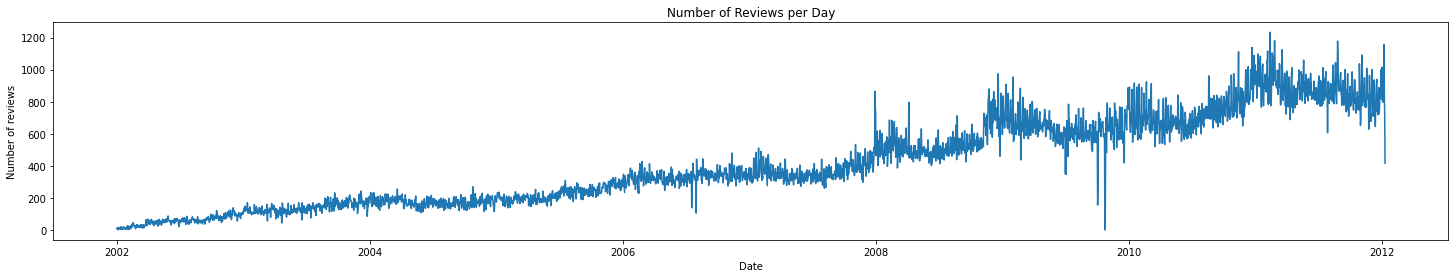

In [0]:
# plot the time trend of reviews
def time_trend(df):
  plt.figure(figsize=(25,4))
  trend_by_date=df[['review_time']].groupby(df['review_time'].dt.date).agg(['count'])
  plt.plot(trend_by_date)
  plt.xlabel('Date')
  plt.ylabel('Number of reviews')
  plt.title('Number of Reviews per Day')
  plt.show()
time_trend(reviews_new)

We then decided to use data from 2002 onwards, as the data beforehand is less representative.  

We also looked at what the relationship between 'review_overall' and other features. To do this we made 'review_avg' and 'review_diff'.

Defintions of new variables:

**'Review_avg'**: This is the mean value of 'review_aroma' , 'review_appearance' , 'review_palate' and 'review_taste'.


**'Review_diff'**: This is the difference between 'review_overall' and 'review_avg'.

In [0]:
reviews_new['review_avg'] = reviews[['review_aroma','review_appearance','review_palate','review_taste']].mean(axis=1)
reviews_new['review_diff'] = reviews_new['review_overall'] - reviews_new['review_avg']
beers = reviews_new

### Exploratory Data Analysis

To begin, we pairplot all the review features and test them to see if there are any relationships among them. 

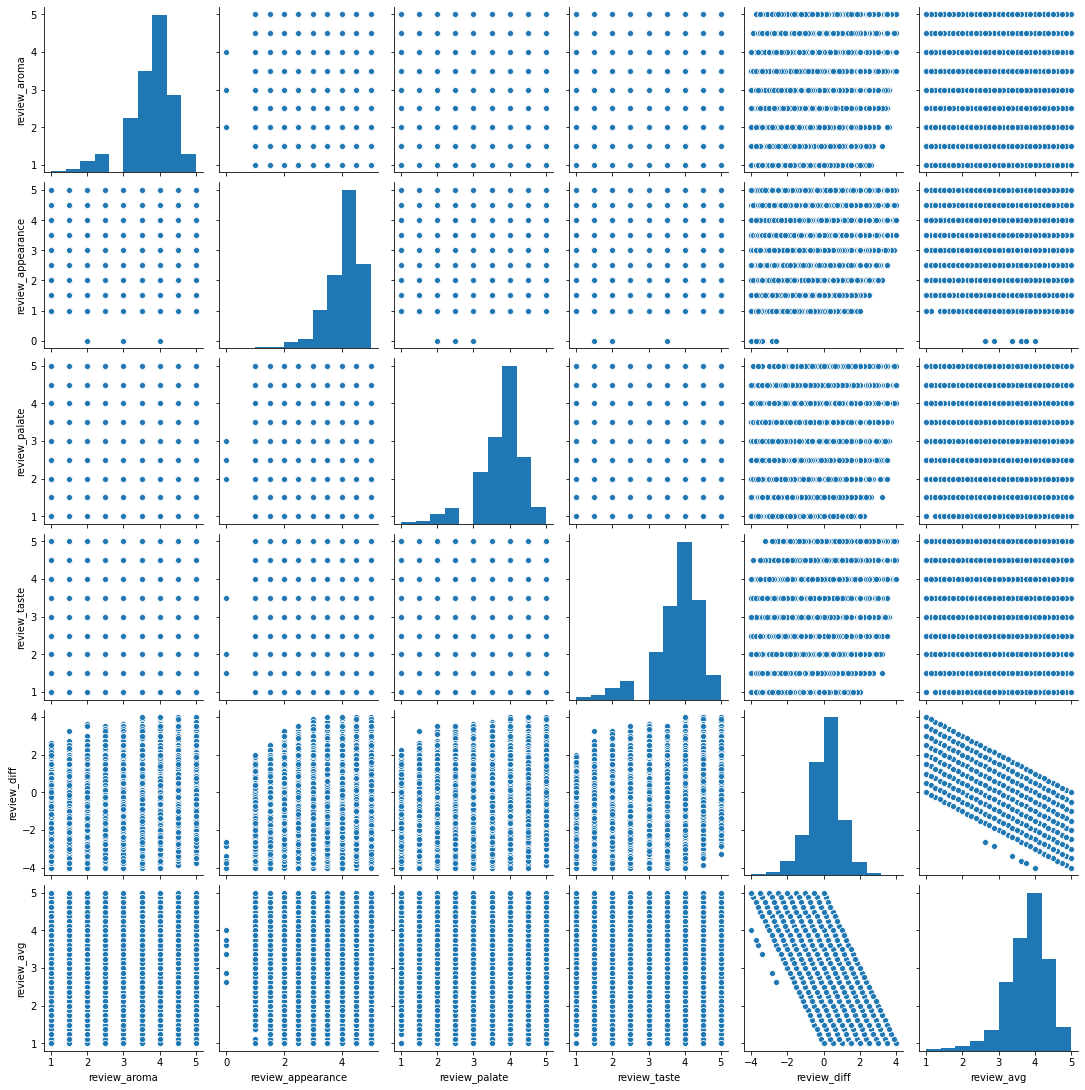

In [0]:
#pairplot to try to find patterns
sns.pairplot(beers, vars = ['review_aroma','review_appearance','review_palate','review_taste', 'review_diff', 'review_avg'])

Although the above pairplot didn't find any patterns, it might just because the above dots are overlapping so patterns cannot be easily observed. 


To test this theory, we set 'jitter = True' to see whether there are any linear correlations between the above data. The idea behind 'jitter = True' is that it lets the data randomly move for a little bit ensure all data points are visible. 

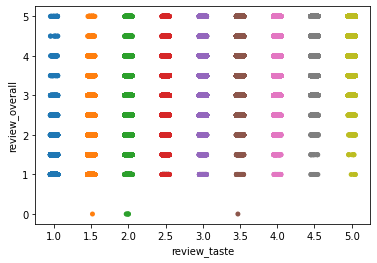

In [0]:
sns.stripplot(data = beers, jitter = True, x = 'review_taste', y = 'review_overall')

It is obvious that these features do not show any correlations. The reason this data lacks correlation is because this data is transactional rather than continuous data. \

Since the nature of the dataset is transactional, we need to see exactly how many beers and breweries are reviewed to have an understanding of what we are analyzing in our data set. 

In [0]:
# Understand how many unique breweries
print( 'Unique breweries:' )
print( 'By ID:', beers[ 'brewery_id' ].nunique() )
print( 'By Name:', beers[ 'brewery_name' ].nunique())
print()
 
# Understand how many unique beers
print( 'Unique beers:' )
print( 'By ID:', beers[ 'beer_beerid' ].nunique() )
print( 'By Name:', beers[ 'beer_name' ].nunique() )

Unique breweries:
By ID: 5206
By Name: 5138

Unique beers:
By ID: 48557
By Name: 44054


As we can see, the numbers of unique names for both breweries and beers are smaller than their respective ID's, so we can conclude that there are different types of beers with the same name. This doesn't surprise us since this is a massive dataset.

Additionally, we want to understand what factors are driving 'review_overall', so we put a heatmap to see whether there are any relationships.

In [0]:
#Best beers overall- do they win because of taste, aroma, etc?

# Factors in the data include: 
rating_factors = ["review_appearance","review_aroma","review_palate","review_taste", "beer_abv","review_overall"]

# Create a correlation matrix 
corr_metrics = beers[rating_factors].corr()
corr_metrics.style.background_gradient(cmap='Blues')

,review_appearance,review_aroma,review_palate,review_taste,beer_abv,review_overall
review_appearance,1.000000,0.558523,0.563995,0.544096,0.263506,0.498015
review_aroma,0.558523,1.000000,0.614189,0.714166,0.332199,0.612110
review_palate,0.563995,0.614189,1.000000,0.731689,0.286033,0.698476
review_taste,0.544096,0.714166,0.731689,1.000000,0.290408,0.786861
beer_abv,0.263506,0.332199,0.286033,0.290408,1.000000,0.137761
review_overall,0.498015,0.612110,0.698476,0.786861,0.137761,1.000000


Let's see how many beers are ranked as a '5' in 'review_overall'. 5 is the highest ranked overall score in our data set.

In [0]:
beers[beers['review_overall'] == 5].count()

brewery_id            87863
brewery_name          87863
review_time           87863
review_overall        87863
review_aroma          87863
review_appearance     87863
review_profilename    87863
beer_style            87863
review_palate         87863
review_taste          87863
beer_name             87863
beer_abv              87863
beer_beerid           87863
review_avg            84906
review_diff           84906
dtype: int64

Too many beers are ranked 5 overall, making this parameter on its own useless. 

### Conclusion from Preliminary Analysis

From our preliminary analysis we can determine that:
1. There aren't clear relationships among the above features because they are transactional data.
2. Aroma, palate and taste seem to be the major drivers for 'review_overall'.
3. It is difficult to conclude what are the "best" beers since there are so many beers with the rating '5', which is the highest number rating. \

Therefore, we can conclude that:

1. Linear regression cannot be used to solve our problem or reach our goal because no linear relationships were found.
2. Other supervised learning tools are less likely to help us because we cannot know how to supervise these models.
3. **Unsupervised learning** is our only choice to make predictions from this data set.


Due to our conslusions, we will try to cluster both the beers and the consumers and see if we can pair up the results. 

## Prepare the data for clustering

The data is **transactional** data collected from 'BeerAdvocates', meaning different beers can be reviewed by different people, and people can review multiple beers. Therefore, this data isn't on either beer level or consumer level. 

In other words, **each row does not represent information of each unique beer or each unique consumer** (review_profilename). \
\
Therefore, **data aggregation** is required to group data to individual beer/consumer level before clustering.\
\
This project considers only **review information** for attributes, since these review attributes are what defines the beers. This project **ignores the "actual" and non-subjective attributes of beers**, being information of breweries and ABV. 

### Aggregate on Beer Level

In [0]:
# Consolidate data on beer level for clustering of beers
d = {'review_aroma': 'mean', 'review_appearance': 'mean',
     'review_palate': 'mean','review_taste': 'mean',
    'review_overall':'mean','review_profilename':'nunique', 'beer_abv':'mean'}
beer = beers.groupby('beer_beerid').agg(d).reset_index()
beer.head()

,beer_beerid,review_aroma,review_appearance,review_palate,review_taste,review_overall,review_profilename,beer_abv
0,5,3.216216,3.486486,3.331695,3.355037,3.567568,407,4.5
1,6,3.516705,3.838134,3.514401,3.644009,3.709677,868,5.6
2,7,3.177370,3.251529,3.110856,3.102446,3.270642,654,4.2
3,8,3.074627,3.291045,3.298507,3.231343,3.641791,67,4.2
4,9,2.853448,3.051724,3.103448,3.043103,3.400862,116,4.2


We use ['review_profilename':'nunique'] to count how many reviews are given for each beer. However, keeping the name 'review_profilename' can be misleading, so we are changing the column to name 'reviews'. 

In [0]:
beer = beer.rename(columns={'review_profilename': 'reviews'})

## Clustering on beer

#### We have prepared functions to beging clustering our beer data below:

In [0]:
# Function to standardise the variables.
def my_scaler(x):
    """standardize the predictors"""
    new_x = pd.DataFrame(scale(x, axis=0, with_mean=True, with_std=True, copy=True))
    new_x.columns = x.columns
    return new_x

In [0]:
# An user-friendly version of Clustering function
def fit_model(customer_feature_df, cluster_number, max_iter, random_state=None):
    """fit K-Means mixture model using the created features"""
    temp_df = customer_feature_df.copy()
    # Fit a KMeans model
    clf = KMeans(n_clusters=cluster_number, max_iter=max_iter, random_state=random_state).fit(temp_df)
    temp_df['cluster'] = clf.predict(temp_df)
    return temp_df

In [0]:
# A tool to plot the result
def plot_cluster_facet(df, cluster_colname, col_wrap=4):
    """plot guitar tab plot for a single cluster"""
    sns.set(style="whitegrid")
    # "Melt" the dataset to "long-form" or "tidy" representation
    melt_df = pd.melt(df, cluster_colname, var_name="measurement")
    # Show the conditional means
    g = sns.factorplot(x="value", y="measurement",
                       col="cluster",  col_wrap=col_wrap, 
                       data=melt_df, kind="point",
                       dodge=False,
                       size=4, aspect=.7);        


In [0]:
# A function to write back information to the original file
def output_file_noscale(cluster_df_output, original_multi_df):
    """Get average ratings and review times for all clusters"""

    cluster_df_output['beer_beerid'] = original_multi_df['beer_beerid']
    df_result = pd.merge(original_multi_df, cluster_df_output[['beer_beerid', 'cluster']], on='beer_beerid',
                                  how='inner')
    df_result = df_result.groupby(['cluster']).mean()

    return df_result

#### Preparations before clustering

In [0]:
# Standardize the features
feature_df = my_scaler(beer.loc[:, ~beer.columns.isin(['beer_beerid'])])

In [0]:
feature_df.head()

,review_aroma,review_appearance,review_palate,review_taste,review_overall,reviews,beer_abv
0,-0.601685,-0.413791,-0.443818,-0.416485,-0.154783,2.982910,-0.864915
1,-0.088450,0.284524,-0.126248,0.047994,0.076686,6.637939,-0.329292
2,-0.668034,-0.880379,-0.827668,-0.822485,-0.638417,4.941244,-1.010994
3,-0.843519,-0.801907,-0.501503,-0.615303,-0.033888,0.287227,-1.010994
4,-1.221292,-1.277160,-0.840545,-0.917870,-0.426314,0.675723,-1.010994


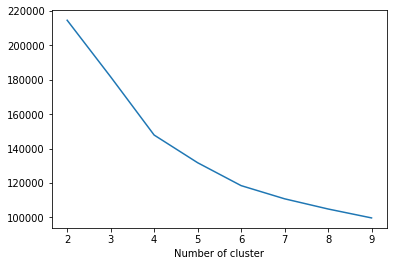

In [0]:
# Scree plot to determine how many clusters should be produced
sse={}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=833).fit(feature_df)
    feature_df["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

The rule of thumb for understanding a **Scree plot** is to see where the '**elbow**' is in the graph. In our case, the elbow is '4', meaning **the tool suggests we make 4 clusters**.\
\
In general, **the fewer the clusters, the more interpretable the clusters are** because the patterns and reasons behind the algorithm can better be explained. \
\
If there are too many clusters produced, then all significant meaning is lost. 

In [0]:
# Drop the clusters from previous test
feature_df = feature_df.drop("clusters",axis=1)

#### Fit Model - Build 4 clusters based on the scree plot




In [0]:
# Use the tool previously designed for clustering
beer_cluster = fit_model(feature_df, 4, 1000, 833)

In [0]:
# See how many beers there are in each cluster
beer_cluster.cluster.value_counts()

2    21366
0    20313
1     6280
3      598
Name: cluster, dtype: int64

#### Explain the model

The below graph illustrates the uniqueness of each beer segment. The result shows how the aggregated attributes compare to the mean values of the dataset in each segment. We can see:\
\
**Cluster 0**: This cluster was reviewed significantly more than average by consumers, but yields very low attribute scores across all categories. Therefore, this cluster will be named '**Normal Beer**'.
\
\
**Cluster 1**: This cluster was reviewed by a decent number of consumers but less than Cluster 0, but yields relatively poor result across all descriptive categories. Therefore, it will be named as ' **Bad Beer**'.
\
\
**Cluster 2**: This cluster was reviewed by a small number of consumers, but yields great results across all descriptive categories. Therefore, it will be named '**Niche Beer**'.
\
\
**Cluster 3**: In this cluster, all contributing attributes yield great results. Therefore, this cluster will be named, '**Popular Beer**'.

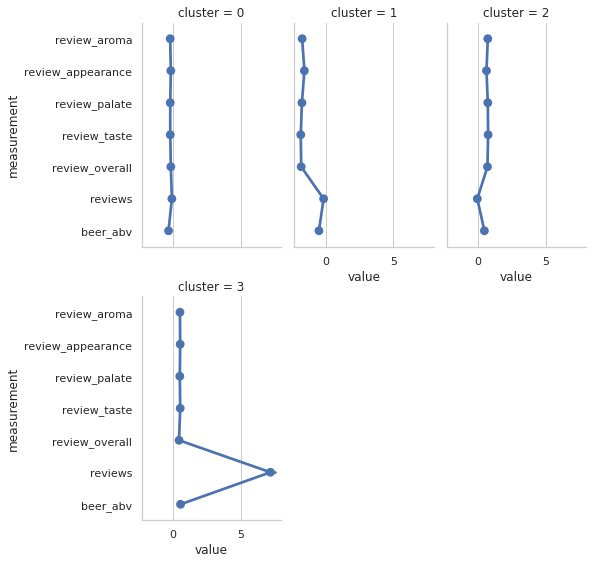

In [0]:
plot_cluster_facet(beer_cluster, 'cluster', col_wrap=3)

In [0]:
beer_cluster_result =output_file_noscale(beer_cluster, beer)
beer_cluster_result = beer_cluster_result.iloc[:,1:]

In [0]:
# Display results in table, so we can see the aggregated differences of each segments. 
beer_cluster_result

,review_aroma,review_appearance,review_palate,review_taste,review_overall,reviews,beer_abv
cluster,,,,,,,
0,3.435496,3.604806,3.458824,3.476502,3.553580,17.939398,5.563285
1,2.550362,2.902204,2.576318,2.468572,2.550549,11.273248,5.253916
2,3.986057,4.006232,3.998177,4.072780,4.085723,23.330057,7.223556
3,3.858877,3.952818,3.866609,3.933830,3.926119,937.392977,7.385100


#### Merge back to the aggregated data

In [0]:
beer_cluster.head()

,review_aroma,review_appearance,review_palate,review_taste,review_overall,reviews,beer_abv,cluster,beer_beerid
0,-0.601685,-0.413791,-0.443818,-0.416485,-0.154783,2.982910,-0.864915,0,5
1,-0.088450,0.284524,-0.126248,0.047994,0.076686,6.637939,-0.329292,3,6
2,-0.668034,-0.880379,-0.827668,-0.822485,-0.638417,4.941244,-1.010994,3,7
3,-0.843519,-0.801907,-0.501503,-0.615303,-0.033888,0.287227,-1.010994,0,8
4,-1.221292,-1.277160,-0.840545,-0.917870,-0.426314,0.675723,-1.010994,0,9


In [0]:
beer_cluster['beer_beerid'] = beer['beer_beerid']

In [0]:
original = pd.merge(beer, beer_cluster[['beer_beerid', 'cluster']], on='beer_beerid',how='inner')

In [0]:
original.head()

,beer_beerid,review_aroma,review_appearance,review_palate,review_taste,review_overall,reviews,beer_abv,cluster
0,5,3.216216,3.486486,3.331695,3.355037,3.567568,407,4.5,0
1,6,3.516705,3.838134,3.514401,3.644009,3.709677,868,5.6,3
2,7,3.177370,3.251529,3.110856,3.102446,3.270642,654,4.2,3
3,8,3.074627,3.291045,3.298507,3.231343,3.641791,67,4.2,0
4,9,2.853448,3.051724,3.103448,3.043103,3.400862,116,4.2,0


Rename the clusters based on the conclusions of previous chapter.

In [0]:
di = {0:'Normal Beer', 1:'Bad Beer', 2:'Niche Beer', 3:'Popular Beer'}
original = original.replace({"cluster": di})

In [0]:
original.head(3)

,beer_beerid,review_aroma,review_appearance,review_palate,review_taste,review_overall,reviews,beer_abv,cluster
0,5,3.216216,3.486486,3.331695,3.355037,3.567568,407,4.5,Normal Beer
1,6,3.516705,3.838134,3.514401,3.644009,3.709677,868,5.6,Popular Beer
2,7,3.177370,3.251529,3.110856,3.102446,3.270642,654,4.2,Popular Beer


In [0]:
# Save the result
beer_result = original[['beer_beerid','cluster']]

Now that we have clustered the beers, we wanted to get some examples of which beers names are in their respective segments.

In [0]:
popular_beer = beers[beers['beer_beerid'] ==6]['beer_name'].unique()
normal_beer = beers[beers['beer_beerid'] ==5]['beer_name'].unique()
niche_beer = beers[beers['beer_beerid'] ==20]['beer_name'].unique()
bad_beer = beers[beers['beer_beerid'] ==29]['beer_name'].unique()
print('Popular Beer:'+ str(popular_beer), '\nNormal Beer:'+ str(normal_beer), '\nNiche Beer:'+ str(niche_beer), '\nBad Beer:'+ str(bad_beer))

Popular Beer:['Turbodog'] 
Normal Beer:['Amber'] 
Niche Beer:['Old Izaak'] 
Bad Beer:["Peter's Brand Pilsner Beer"]


## Clustering Consumers

Since we  now understand the differences in beer segments, we now need to segment **consumers** based on their preferences in order to be able to make recommendations based on such segmentation. Again, we will use clustering for this task. 

#### Merge results back to raw data

Firstly, we need to merge the results from beer clustering back to the raw data to understand which newly created segment each individual beer belongs to.  

In [0]:
df = pd.merge(beer_result, beers, on='beer_beerid',how='inner')

In [0]:
df.head()

,beer_beerid,cluster,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,review_avg,review_diff
0,5,Normal Beer,3,Abita Brewing Co.,2003-11-29 21:36:06,5.0,3.5,4.5,masterbruewer,Vienna Lager,3.0,4.0,Amber,4.5,3.125,1.875
1,5,Normal Beer,3,Abita Brewing Co.,2002-07-23 07:57:58,5.0,4.5,4.0,oberon,Vienna Lager,4.0,4.0,Amber,4.5,3.500,1.500
2,5,Normal Beer,3,Abita Brewing Co.,2010-04-20 14:57:07,5.0,3.0,3.5,junjun,Vienna Lager,4.0,3.5,Amber,4.5,3.250,1.750
3,5,Normal Beer,3,Abita Brewing Co.,2005-12-16 18:49:57,5.0,3.0,4.0,shbobdb,Vienna Lager,2.0,3.5,Amber,4.5,4.125,0.875
4,5,Normal Beer,3,Abita Brewing Co.,2006-02-25 18:27:37,5.0,3.0,2.5,scruffwhor,Vienna Lager,4.0,3.5,Amber,4.5,4.250,0.750


#### Preparation before clustering

Again, we need to groupby the data to individual consumer's level, as previously explained. 

In [0]:
users = df.groupby(['review_profilename','cluster'])['review_overall'].mean().reset_index()

In [0]:
users.head()

,review_profilename,cluster,review_overall
0,0110x011,Niche Beer,4.091549
1,0110x011,Normal Beer,4.333333
2,0110x011,Popular Beer,4.403509
3,01Ryan10,Niche Beer,5.000000
4,02maxima,Bad Beer,3.000000


Before clustering, we need to understand whether each consumer has reviewed multiple kinds of beers. If a consumer has not reviewed multiple beers, we have to figure out how to deal with this. By not reviewing this potential situation, we assume the consumer has never tried the beer and therefore has no say in the beer's review.
\
\
Therefore, useful data to solve this problem is the consumers who have drank beers from all 4 previously distinguished segments of beers. These reviewers who have reviewed beer from each of the 4 clusters are most reliable and trustworthy for our future recommendations.

In [0]:
userresult =users.set_index(['review_profilename','cluster'])['review_overall'].unstack(fill_value='NA').reset_index()

In [0]:
userfull = userresult[ (userresult['Bad Beer'] != 'NA') &
          (userresult['Niche Beer'] != 'NA') &
          (userresult['Popular Beer'] != 'NA') &
          (userresult['Normal Beer'] != 'NA') ]

In [0]:
# How many useful data?
len(userfull)

6255

### Cluster on users 

In [0]:
userfull.head()

cluster,review_profilename,Bad Beer,Niche Beer,Normal Beer,Popular Beer
5,05Harley,3,4.22388,4.5,4.20896
12,1000Bottles,2,4.25,3.7,3.875
14,100floods,3.5,4.03086,3.54,4.16667
25,1121987.0,4,4.6,4.26923,4.3125
29,11thFloorBrewing,2.75,4.5,4.33333,4.375


In [0]:
#Prepare the dataframe
feature_df = userfull.loc[:, ~userfull.columns.isin(['review_profilename'])]

In [0]:
feature_df.head()

cluster,Bad Beer,Niche Beer,Normal Beer,Popular Beer
5,3,4.22388,4.5,4.20896
12,2,4.25,3.7,3.875
14,3.5,4.03086,3.54,4.16667
25,4,4.6,4.26923,4.3125
29,2.75,4.5,4.33333,4.375


As previously explained, this step determines how many clusters to produce based off the reviewers who have drank beer from all 4 clusters.

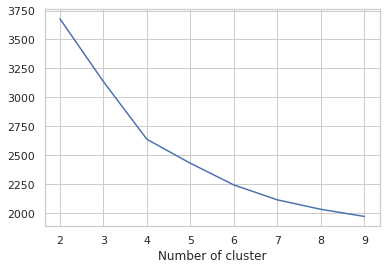

In [0]:
sse={}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=833).fit(feature_df)
    feature_df["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [0]:
feature_df = feature_df.drop("clusters",axis=1)

#### Fit Model: Build 4 clusters based on the scree plot of reviewers.


In [0]:
#Fit Model - Build 4 clusters based on the scree plot
user_cluster = fit_model(feature_df, 4, 1000, 833)

In [0]:
user_cluster.cluster.value_counts()

1    2285
3    1623
2    1252
0    1095
Name: cluster, dtype: int64

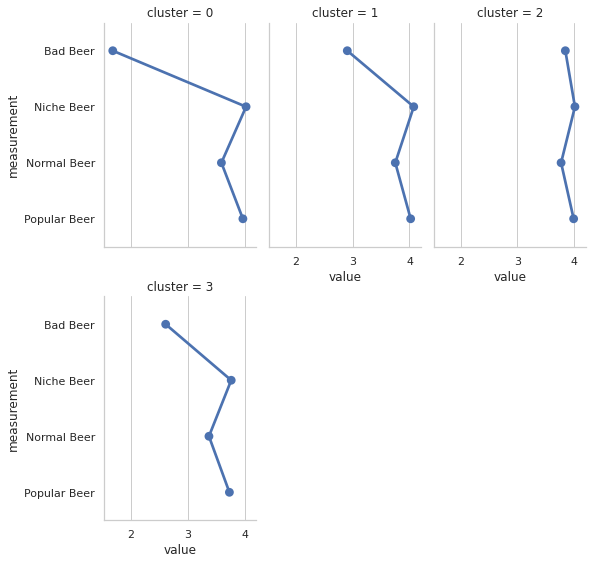

In [0]:
plot_cluster_facet(user_cluster, 'cluster', col_wrap=3)

We can see that cluster 0 and cluster 1 are very similar and become hard to differentiate, so we will produce three clusters instead by combining clusters 0 and 1.

#### Fit Model - Build 3 clusters based on the scree plot




In [0]:
user_cluster = fit_model(feature_df, 3, 1000, 833)

In [0]:
user_cluster.cluster.value_counts()

0    3478
2    1422
1    1355
Name: cluster, dtype: int64

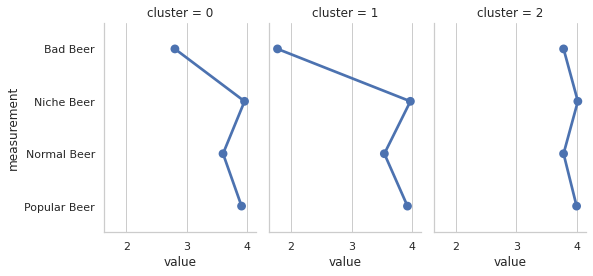

In [0]:
plot_cluster_facet(user_cluster, 'cluster', col_wrap=3)

Here, we can see the difference between drinker groups:

Cluster 0. These are **normal drinkers** who can moderately identify good or bad beers, and they enjoy both niche and popular beers.

Cluster 1. These are **expert drinkers** that can clearly identify what type of beer is good and which is bad.

Cluster 2. These are **indifferent drinkers** because they don't seem to be able to tell what beer is good or which is bad. 

In [0]:
# Rename the clusters
di = {0: "Normal drinker", 1: "Expert drinker",2:'Indifferent drinker'}
user_cluster = user_cluster.replace({"cluster": di})

In [0]:
user_cluster.head()

cluster,Bad Beer,Niche Beer,Normal Beer,Popular Beer,cluster
5,3,4.22388,4.5,4.20896,Normal drinker
12,2,4.25,3.7,3.875,Expert drinker
14,3.5,4.03086,3.54,4.16667,Indifferent drinker
25,4,4.6,4.26923,4.3125,Indifferent drinker
29,2.75,4.5,4.33333,4.375,Normal drinker


## Conclusion

We have successfully segmented the beers into 4 clusters, as well as documeted how customers react to these beers. We have successfully found the drinking patterns of these consumers, and we can use this result to advise beer retailers how to recommend beers to their respective consumers and their target clusters.